### Step-step
1. Membaca gambar.
2. Konversi gambar ke dalam skala abu-abu.
3. Deteksi tepi menggunakan algoritma seperti Canny Edge Detection.
4. Terapkan transformasi Hough untuk mendeteksi lingkaran.
5. Tentukan pusat dan jari-jari lingkaran.
6. Gambar lingkaran di atas gambar asl

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

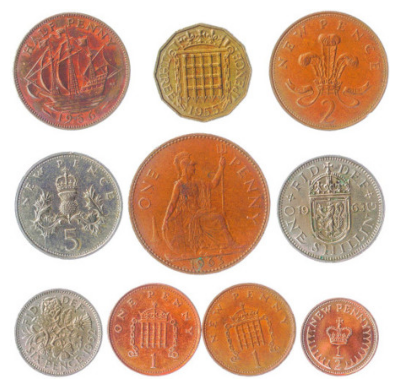

In [9]:
# Baca gambar
image_path = "coin.jpg"
image = cv2.imread(image_path)

# Tampilkan gambar awal
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


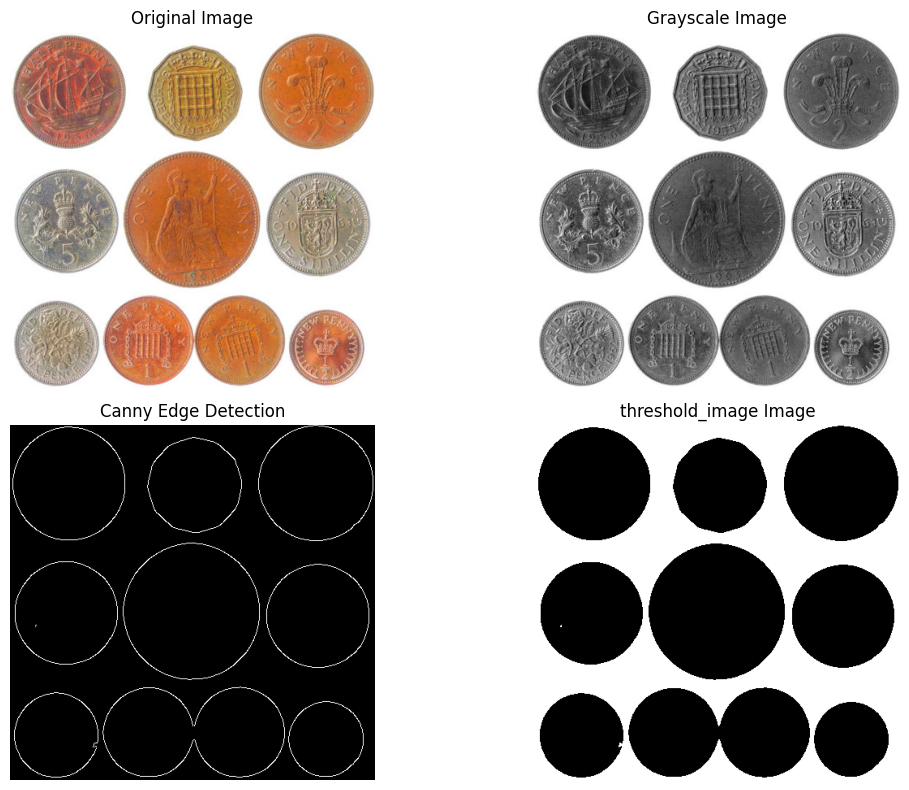

In [10]:
def preprocess_image(image):
    # Konversi ke citra ke skala abu-abu
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Proses dengan Gaussian Blur
    blurred = cv2.GaussianBlur(gray, (7, 7), 0)
    
    # Proses thresholding untuk mendapatkan citra biner
    _, threshold_image = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
    # Deteksi tepi menggunakan Canny edge detector
    canny = cv2.Canny(threshold_image, 90, 255)
    
    # Operasi erosi dengan kernel kecil
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
    eroded_image = cv2.erode(canny, kernel, iterations=1)
    # Menampilkan hasil masing-masing tahapan
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(gray, cmap='gray')
    plt.title('Grayscale Image')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.imshow(canny, cmap='gray')
    plt.title('Canny Edge Detection')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(threshold_image, cmap='gray')
    plt.title('threshold_image Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
    return eroded_image

# Panggil fungsi preprocessing dengan gambar yang telah diambil
eroded_image = preprocess_image(image)

In [11]:
# Deteksi lingkaran menggunakan Transformasi Hough Lingkaran
def detect_circles(image):
    # Konversi gambar ke skala abu-abu (jika belum dalam skala abu-abu)
    if len(image.shape) > 2:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image
    
    # Deteksi tepi menggunakan Canny edge detector
    edges = cv2.Canny(gray, 90, 150)
    
    # Deteksi lingkaran menggunakan Transformasi Hough Lingkaran
    circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, dp=1, minDist=20,
                               param1=50, param2=30, minRadius=10, maxRadius=100)
    return circles

In [12]:
# Deteksi lingkaran pada gambar hasil thresholding
detected_circles = detect_circles(eroded_image)

# Hitung berapa banyak lingkaran yang terdeteksi
num_detected_circles = 0
if detected_circles is not None:
    num_detected_circles = len(detected_circles[0])
# Gambar lingkaran yang terdeteksi di atas gambar asli
if detected_circles is not None:
    # Konversi koordinat dan jari-jari lingkaran ke tipe data integer
    detected_circles = np.uint16(np.around(detected_circles))
    for i, circle in enumerate(detected_circles[0, :]):
        center = (circle[0], circle[1])  # Koordinat pusat lingkaran
        radius = circle[2]  # Jari-jari lingkaran
        # Gambar lingkaran di atas gambar asli
        cv2.circle(image, center, radius, (0, 255, 0), 3)
        # Tambahkan angka di sekitar lingkaran
        cv2.putText(image, str(i), (center[0]-10, center[1]+10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)


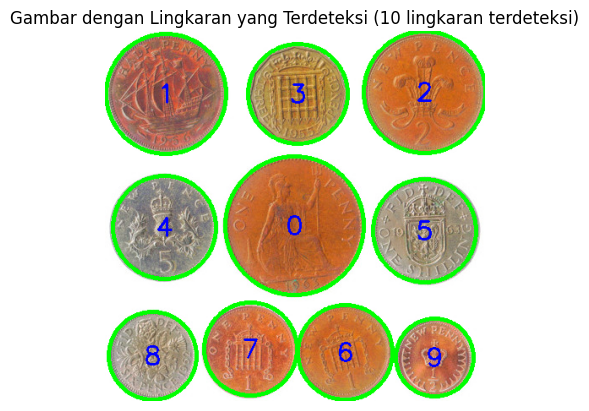

In [13]:

# Tampilkan gambar dengan lingkaran yang terdeteksi
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title(f'Gambar dengan Lingkaran yang Terdeteksi ({num_detected_circles} lingkaran terdeteksi)')
plt.axis('off')
plt.show()